# Boundary Value Problem

**강좌**: *수치해석 프로젝트*

## Boundary Value Problem
2계 이상의 상미분 방정식에서 경계 조건만으로 구성될 수 있다.

$$
\ddot{y}=f(t, y, \dot{y}),~~~y(0) = y_0,~y(L) = y_L. 
$$

이러한 문제를 Boundary Value Problem이라 한다.

크게 2가지 방법으로 해석한다.

- Shooting Method

- Direct Method

### SciPy 활용

`solve_bvp` 함수를 이용해서 해를 구할 수 있다.

### 예제
간단한 Beam의 방정식을 생각하자.

$$
\ddddot{y} = f(x),
$$

여기서
- $y$ : 변위
- $\dot{y}$ : 기울기
- $\ddot{y}$ : Beam moment
- $\dddot{y}$ : Vertical Force

Beam은 $[-1, 1]$에 존재한다. $f(x)=-1$ 로 간단하게 생각하자.
다음 경계 조건에 대해 해석하자

- 양쪽이 모두 고정된 경우 (clamped, $y=\dot{y}=0$)
- 왼쪽은 고정, 오른쪽은 위치만 고정
- 양쪽다 위치만 고정 (Simply supported, $y=\ddot{y}=0$)

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

In [2]:
from scipy.integrate import solve_bvp

In [3]:
# 해석점을 101개로 설정
n = 101
x = np.linspace(-1, 1, n)
y = np.zeros((4, n))

# Beam 방정식
def f(t, y):
    return np.array([y[1], y[2], y[3], -1*np.ones_like(y[3])])

In [4]:
# 경계 조건 1
def bc(ya, yb):
    return np.array([ya[0], ya[1], yb[0], yb[1]])

sol1 = solve_bvp(f, bc, x, y)

In [5]:
# 경계 조건 2
def bc(ya, yb):
    return np.array([ya[0], ya[1], yb[0], yb[2]])

sol2 = solve_bvp(f, bc, x, y)

In [6]:
# 경계 조건 3
def bc(ya, yb):
    return np.array([ya[0], ya[2], yb[0], yb[2]])

sol3 = solve_bvp(f, bc, x, y)

(-0.4, 0.01)

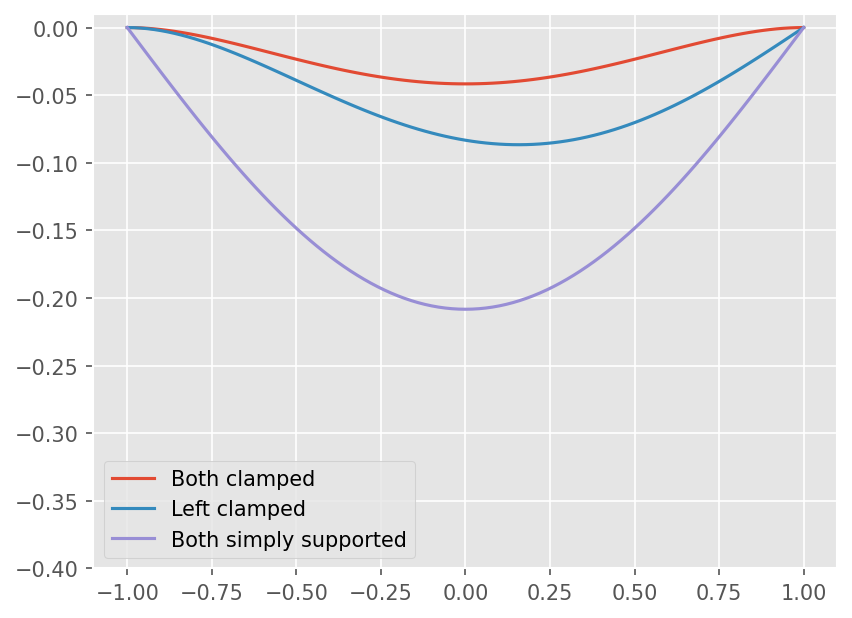

In [7]:
plt.plot(sol1.x, sol1.y[0])
plt.plot(sol2.x, sol2.y[0])
plt.plot(sol3.x, sol3.y[0])
plt.legend(['Both clamped', 'Left clamped', 'Both simply supported'])
plt.ylim(-0.4, 0.01)